Import Libraries

In [1]:

from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Import Dataset from UCI repository using the code provided in(Import in Python section): https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [3]:
#Create Dataframe and add independent variable
df = pd.DataFrame(X)

In [4]:
#Add dependent variable in dataframe
df['class'] = y

In [5]:
df.count() #Total count of features, all continous variables

fLength     19020
fWidth      19020
fSize       19020
fConc       19020
fConc1      19020
fAsym       19020
fM3Long     19020
fM3Trans    19020
fAlpha      19020
fDist       19020
class       19020
dtype: int64

In [6]:
df.head() #Checking top 5 data observations

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df.describe().T #Data have negative values,  statistical summary of data

,count,mean,std,min,25%,50%,75%,max
fLength,19020.0,53.250154,42.364855,4.2835,24.336000,37.14770,70.122175,334.1770
fWidth,19020.0,22.180966,18.346056,0.0000,11.863800,17.13990,24.739475,256.3820
fSize,19020.0,2.825017,0.472599,1.9413,2.477100,2.73960,3.101600,5.3233
fConc,19020.0,0.380327,0.182813,0.0131,0.235800,0.35415,0.503700,0.8930
fConc1,19020.0,0.214657,0.110511,0.0003,0.128475,0.19650,0.285225,0.6752
fAsym,19020.0,-4.331745,59.206062,-457.9161,-20.586550,4.01305,24.063700,575.2407
fM3Long,19020.0,10.545545,51.000118,-331.7800,-12.842775,15.31410,35.837800,238.3210
fM3Trans,19020.0,0.249726,20.827439,-205.8947,-10.849375,0.66620,10.946425,179.8510
fAlpha,19020.0,27.645707,26.103621,0.0000,5.547925,17.67950,45.883550,90.0000
fDist,19020.0,193.818026,74.731787,1.2826,142.492250,191.85145,240.563825,495.5610


In [8]:
df.duplicated().sum() #check duplicates

115

In [9]:
#drop duplicates
df = df.drop_duplicates(ignore_index = True) #delected duplicate items
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
18900,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
18901,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
18902,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
18903,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [10]:
df.isna().sum() #check null values

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

array([[<Axes: title={'center': 'fLength'}>,
        <Axes: title={'center': 'fWidth'}>,
        <Axes: title={'center': 'fSize'}>],
       [<Axes: title={'center': 'fConc'}>,
        <Axes: title={'center': 'fConc1'}>,
        <Axes: title={'center': 'fAsym'}>],
       [<Axes: title={'center': 'fM3Long'}>,
        <Axes: title={'center': 'fM3Trans'}>,
        <Axes: title={'center': 'fAlpha'}>],
       [<Axes: title={'center': 'fDist'}>, <Axes: >, <Axes: >]],
      dtype=object)

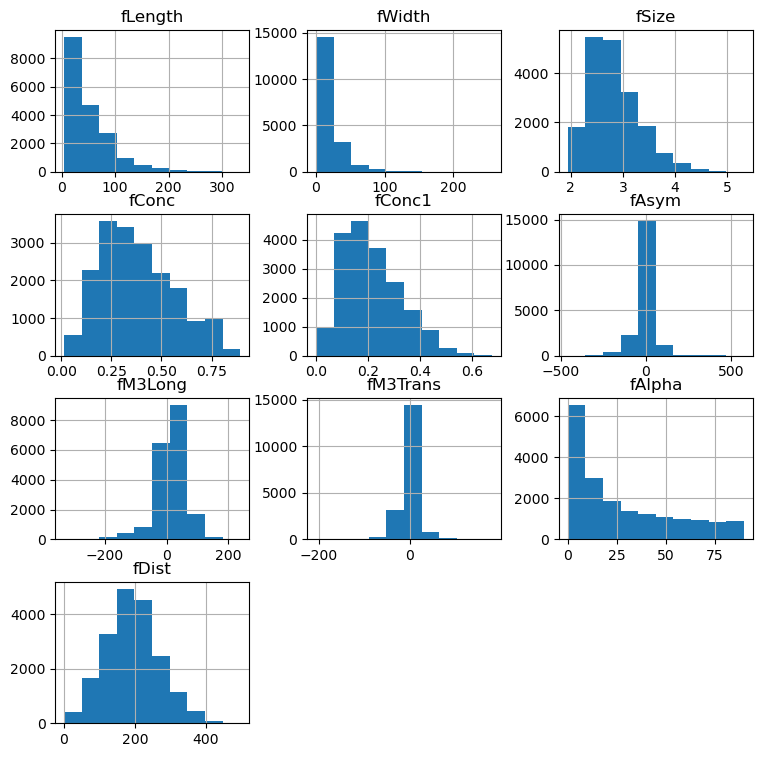

In [11]:
df.hist(figsize=(9,9)) #Check distribution of data,
#Data is not uniformly distributed

<Axes: >

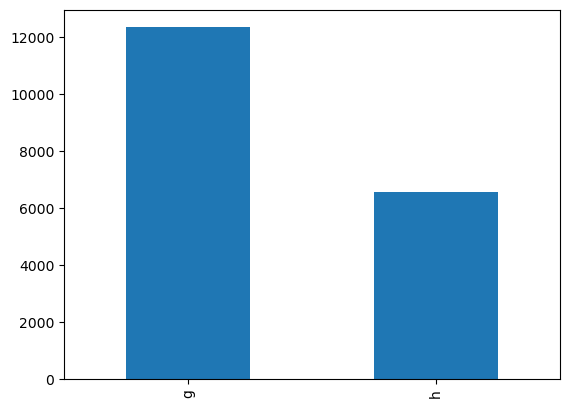

In [12]:
df['class'].value_counts().plot(kind = 'bar') #data is imbaalnced

In [13]:
#map target class with numerical value(encoding the label)
dict = {'g': 1, 'h': 0} 
df['class'] = df['class'].map(dict)

<Axes: >

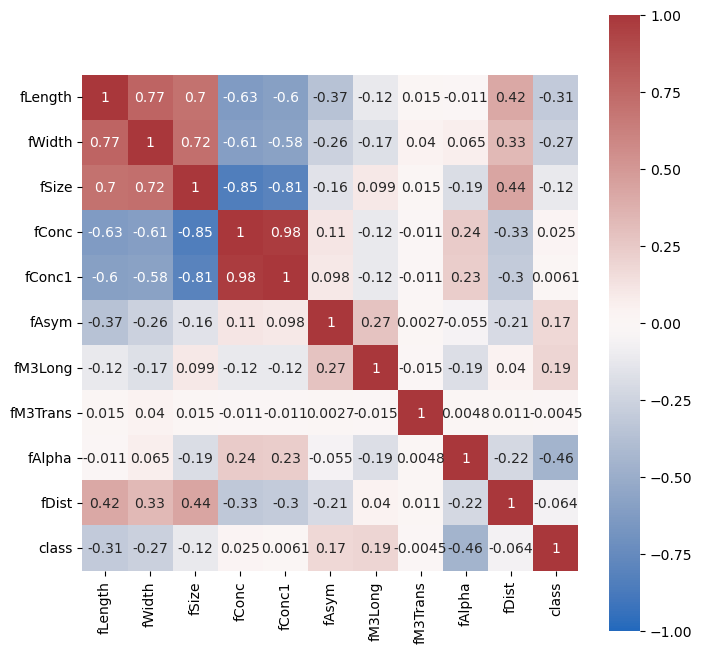

In [14]:
# Look for correlations between features
corr = df.corr() 
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot= True, vmin=-1, vmax=1, cmap = 'vlag', square= True)
# Alcohol content is most correlated to wine quality (positively correlated)

In [15]:
#fCoonc is very much correlted to fConc1 -0.98(so will drop any one decide based on t-test)

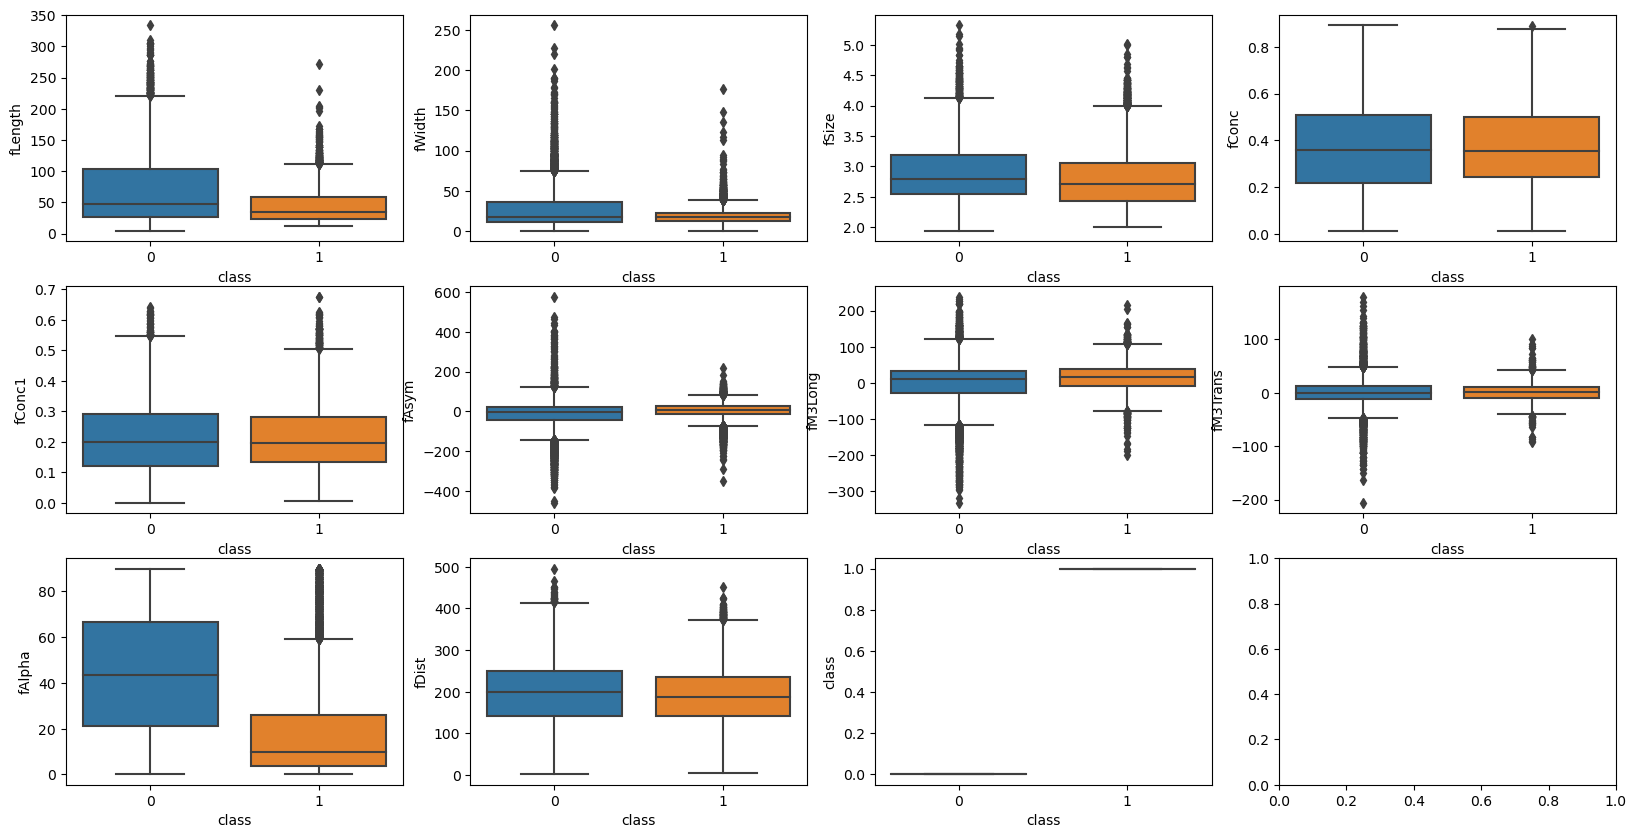

In [16]:
#Analysing independent variable with boxplot
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (20,10))
ax = ax.flatten()
count= 0
for col in df.columns:
    sns.boxplot(y = col, x = 'class', data = df, ax = ax[count])
    count= count +1

In [17]:
#Numerical data hypothesis testing - Annova test

In [18]:
cols = df.select_dtypes(np.number).columns.to_list()

In [19]:
cols

['fLength',
 'fWidth',
 'fSize',
 'fConc',
 'fConc1',
 'fAsym',
 'fM3Long',
 'fM3Trans',
 'fAlpha',
 'fDist',
 'class']

In [20]:
num_best = SelectKBest(score_func=f_classif, k = 'all')
num_best.fit(df[cols], df['class'])
p_values = num_best.pvalues_

scores = num_best.scores_

df_scores = pd.DataFrame(p_values, columns=['P_value'])
df_scores
df_scores['score'] = scores
df_scores['feature'] = cols
df_scores.sort_values(by = 'P_value') 

C:\Users\vinit\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,P_value,score,feature
0,0.000000e+00,1983.234608,fLength
8,0.000000e+00,5085.211349,fAlpha
10,0.000000e+00,inf,class
1,1.738597e-303,1438.732517,fWidth
6,6.764716e-159,735.323738,fM3Long
5,1.263574e-125,577.027364,fAsym
2,2.181241e-59,265.970553,fSize
9,1.480286e-18,77.444683,fDist
3,4.678043e-04,12.244104,fConc
4,4.052675e-01,0.692672,fConc1


In [21]:
p_val =df_scores[df_scores['P_value'] >0.05] #two features with hypothesis that is no difference between the two class,
p_val.sort_values(by = 'P_value')

,P_value,score,feature
4,0.405268,0.692672,fConc1
7,0.534688,0.385488,fM3Trans


In [22]:
#we will not consider fConc1 as it is much correlated with fConc and also it is with hypothesis
df1 = df.drop('fConc1', axis =1)

In [23]:
x1 = df1.drop('class', axis =1)#seperating dependent and independent variables
y1 = df1['class']

In [24]:
scaler =StandardScaler() # creating object of standard scaler which will be used for standardisation
#scaler = MinMaxScaler(feature_range=(-1, 1)) #minmax scaling reduces accuracy

In [25]:
x1= pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns) #perform standardisation normalisation


In [26]:
x1.head() #check first 5 observation of standardised independent variables

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.576561,-0.335722,-0.380518,0.063233,0.540232,0.223818,-0.407325,0.480798,-1.497378
1,-0.510139,-0.569523,-0.648108,0.821287,0.516029,0.259433,-0.491788,-0.812455,0.154631
2,2.576763,6.223170,2.617804,-1.876512,2.049177,-1.482865,-2.188976,1.894320,0.844567
3,-0.694395,-0.687046,-1.029170,1.283235,0.531933,-0.335606,-0.356715,-0.655717,-1.030687
4,0.520007,0.479483,0.712283,-0.347266,-0.022875,0.352336,1.038759,-0.878128,2.179182


In [27]:
#split the data into train and test with 80% for training and 20% for testing with stratified to make sure data is distributed in equal ratio
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, stratify=y1, random_state=42) 

In [28]:
x_train.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
12781,-0.951751,-0.597320,-1.223512,1.981084,0.319182,-0.349913,-0.502855,1.757715,1.038318
4434,0.386162,0.249753,1.491978,-1.214240,0.825674,1.043086,1.043539,-1.018793,0.430916
10145,-0.748062,-0.476300,-0.475784,0.751776,0.289034,-0.372561,0.536033,-0.455083,0.603323
680,-0.946256,-0.631255,-1.223512,2.198374,-0.160235,-0.295103,-0.539649,-0.414542,-1.556038
4977,-0.751612,-0.397393,-1.119990,0.440892,-0.508500,0.135838,0.291481,-0.384997,-1.587270


In [29]:
# x_train.to_csv('x_train.csv', index=False) #saved pre-processed data to train models
# y_train.to_csv('y_train.csv', index = False)
# x_test.to_csv('x_test.csv', index = False)
# y_test.to_csv('y_test.csv', index= False)

In [30]:
#--------------------------------------pre-processing of data end------------------------------------------------------------